In [1]:
import fenics as fe
import matplotlib.pyplot as plt

In [2]:
#Solve the heat eqution PDE:
    #d(u(t,x))/dt = d2(u(t,x))/dx2 + f
    #rod with x e [0.0,1.0]
    #with homogeneous Dirichlet Boundary Conditions (u(0.0)=u(1.0)=0.0)
    #heat source f
    #using a sin(pi*x) initial condition

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


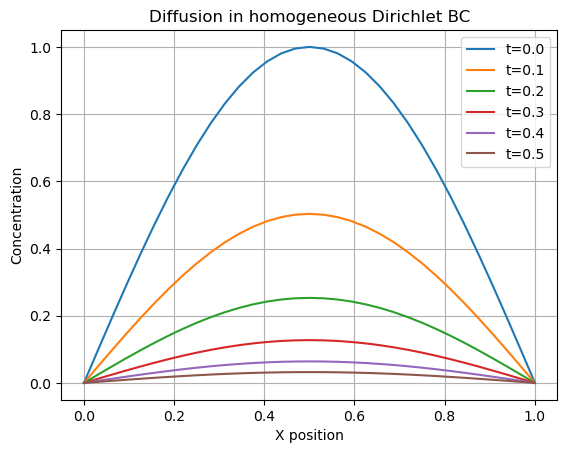

In [3]:
if __name__ == "__main__":
    n_elements = 32
    mesh = fe.UnitIntervalMesh(n_elements)

    #Define a Function Space
    lagrange_polynomial_space_first_order = fe.FunctionSpace(
        mesh,
        "Lagrange",
        1
    )

    #The value of the solution on the boundary
    u_on_boundary = fe.Constant(0.0)

    #A function to return whether we are on the boundary
    def boundary_boolean_function(x, on_boundary):
        return on_boundary

    #The homogenous Dirichlet Boundary Condition
    boundary_condition = fe.DirichletBC(
        lagrange_polynomial_space_first_order,
        u_on_boundary,
        boundary_boolean_function,
    )

    #The initial condition, u(t=0.0,x) = sin(pi*x) C++string
    initial_condition = fe.Expression(
        "sin(3.141 * x[0])",
        degree = 1,
    )

    #Discretize the initial condition
    u_old = fe.interpolate(
        initial_condition,
        lagrange_polynomial_space_first_order
    )
    plt.figure()
    fe.plot(u_old, label="t=0.0")

    #The time stepping of the implicit Euler discretization (=dt)
    time_step_length = 0.1

    #The forcing on the rhs of the PDE
    heat_source = fe.Constant(0.0)

    #Create the finite element problem
    u_trial = fe.TrialFunction(lagrange_polynomial_space_first_order)
    v_test = fe.TestFunction(lagrange_polynomial_space_first_order)

    weak_form_residuum = (
        u_trial * v_test * fe.dx
        +
        time_step_length * fe.dot(
            fe.grad(u_trial),
            fe.grad(v_test),
        ) * fe.dx
        -
        (
            u_old * v_test * fe.dx
            +
            time_step_length * heat_source * v_test * fe.dx
        )
    )

    #We have a linear PDE that is separable into a lhs and rhs
    weak_form_lhs = fe.lhs(weak_form_residuum)
    weak_form_rhs = fe.rhs(weak_form_residuum)

    #The function will be solving for at each point in time
    u_solution = fe.Function(lagrange_polynomial_space_first_order)

    #Time stepping
    n_time_steps = 5

    time_current = 0.0
    for i in range(n_time_steps):
        time_current += time_step_length

        # Finite Element Assembly, BC imprint & solving the linear system
        fe.solve(
            weak_form_lhs == weak_form_rhs,
            u_solution,
            boundary_condition,
        )

        u_old.assign(u_solution)

        fe.plot(u_solution, label=f"t={time_current:1.1f}")

    plt.legend()
    plt.title("Diffusion in homogeneous Dirichlet BC")
    plt.xlabel("X position")
    plt.ylabel("Concentration")
    plt.grid()
    plt.show()